## **DefiR_Team1**
D'après un script original de Gaelle Lelandais
le.lelandais@universite-paris-saclay.fr>
Ce contenu est sous Licence CC BY-SA 4.0
https://creativecommons.org/licenses/by-sa/4.0/

Le script ci-dessous permet de réaliser un groupement de gènes et de générer à la fois des figures et des tableaux représentatifs des niveaux obtenus pour les différents groupes.

Au choix :
* Distance euclédienne ou corrélation
* Classification de type HCL ou Kmeans
* Le nombre de clusters
* Sortie graphique sous forme de plots ou heatmaps
* Obtenir ou non des fichiers csv en sortie pour chaque groupe

Ce script nécessite de disposer dans le dossier de travail des fichiers suivants :
* Matrice de données au format .txt
* Script intitulé "graphFunctions.R" qui contient les fonctions graphiques


## Indiquer l'emplacement de travail

In [3]:
setwd("/shared/ifbstor1/projects/uparis_duo_2020/Team_1")

In [4]:
getwd()

[1] "/shared/ifbstor1/projects/uparis_duo_2020/Team_1"

--------------------------------------------------
## Chargement des fonctions
La première étape consiste à charger les différentes fonctions.
### Fonction 1 - Lecture du fichier

In [5]:
dataReading <- function(FileName, folder = "./"){
  
  data = read.table(paste(folder, FileName, sep = ""), header = T, row.names = 1)
  expMatrix = as.matrix(data)
  
  return(expMatrix)
    }

### Fonction 2 - Calcul des matrices de distance

In [6]:
distCalc <- function(expMatrix, distName){
  
  if(distName == "EUCLIDEAN"){
    
    distMat = dist(expMatrix)
    return(distMat)
    
  }else if(distName == "CORRELATION"){

    distMat = as.dist(1 - cor(t(expMatrix)))
    return(distMat)
    
  }else{
    
    print(paste("The distance", distName, "is unknown"))
  }   
}

### Fonction 3 - Création des groupes

In [7]:
createClusters <- function(distMat, algo, N){
  
  if(algo == "KMEANS"){
    
    res = kmeans(distMat, N)
    vecClusters = res$cluster
    return(vecClusters)
    
  }else if(algo == "HCL"){
    
    res = hclust(distMat)
    vecClusters = cutree(res, N)
    return(vecClusters)
    
  }else{

    print(paste("The algorithm", algo, "is unknown"))
  }
  
}


### Fonction 4 : Extraction des clusters

In [8]:
extractCluster <- function(expMat, vecCluster, number){
  
  clusterMat = expMat[which(vecCluster == number),]
  return(clusterMat)
  
}

### Fonction 5 : Création des listes de gènes (tableaux)

In [9]:
GeneListCluster <- function(fileName, expMat, vecCluster, number, algo, distance, genelist){
  if(genelist == "TRUE"){  
    clusterMat = expMat[which(vecCluster == number),]
    write.csv2(clusterMat, paste(fileName,"_","Cluster #", number,"_",algo,"_",distance,".csv"))
    return(clusterMat)}
  
}

### Fonction 6 : Génération des graphiques 

In [10]:
drawGraph <- function(expMat, type, title){
  
  source("graphFunctions.R")
  
  if(type == "PROFILES"){
    
    plotGenes(expMat, yMax = ceiling(max(expMat)), title = title)
        
  }else if(type == "HEATMAP"){
    
    heatmapGenes(expMat, title = title)
  }else if(type == "BOTH"){
    plotGenes(expMat, yMax = ceiling(max(expMat)), title = title)
    heatmapGenes(expMat, title = title)
  }else{

    print(paste("The representation", type, "is unknown"))
  }
  
}

## Assemblage des fonctions pour générer la fonction principale

Cette fonction principale a 6 arguments :
* <kbd>fileName</kbd> = nom_du_fichier.txt
* <kbd>distance</kbd> = EUCLIDEAN ou CORRELATION
* <kbd>N</kbd> = nombre de clusters
* <kbd>algo</kbd> = KMEANS ou HCL
* <kbd>outputGraph</kbd> = PROFILES ou HEATMAP ou BOTH
* <kbd>genelist</kbd> = TRUE ou FALSE


In [11]:
myClustering <- function(fileName, distance, algo, N, outputGraph, genelist){
  mat      = dataReading(fileName)
  matDist  = distCalc(mat, distance)
  clustRes = createClusters(matDist, algo, N)
  
  for(i in 1:N){
    clust = extractCluster(mat, clustRes, i)
    GeneListCluster(fileName, mat, clustRes, i, algo, distance, genelist)
    drawGraph(clust, outputGraph, title = paste("Cluster #", i,"_",algo,"_",distance, sep = ""))
    
  }
  
}

## Appel de la fonction
Par exemple : 
Le script ci-dessous permet de faire l'analyse du fichier "Strepto_core_genes_log2.txt" selon une analyse de distance de corrélation et un regroupement de 4 clusters selon l'algorithme des K-means pour générer les 2 types de sorties graphiques, et la liste de gènes correspondant à chaque cluster.

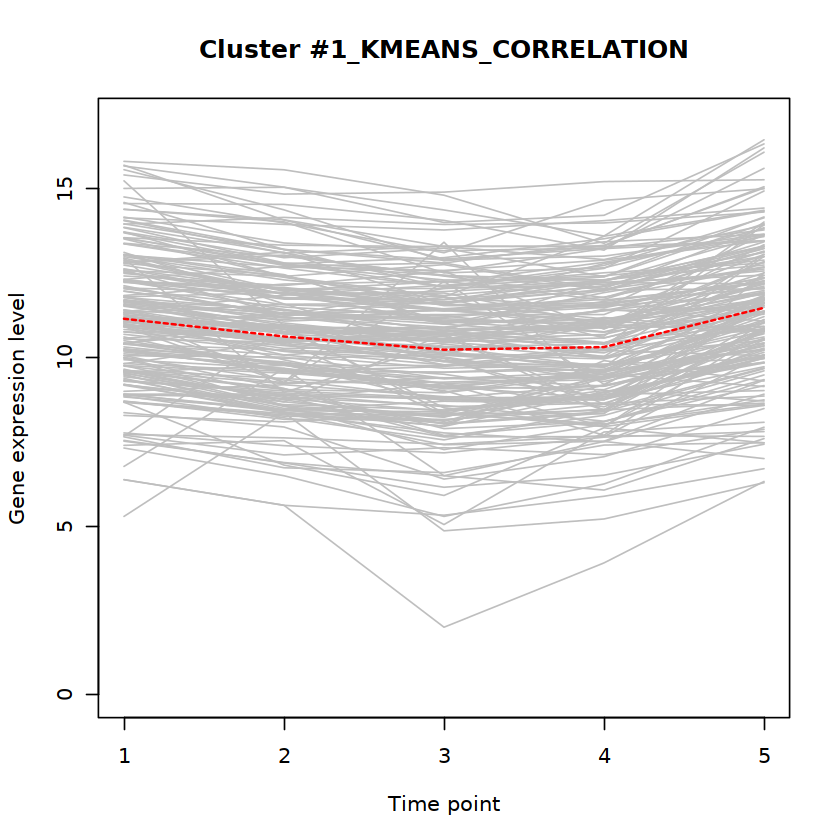

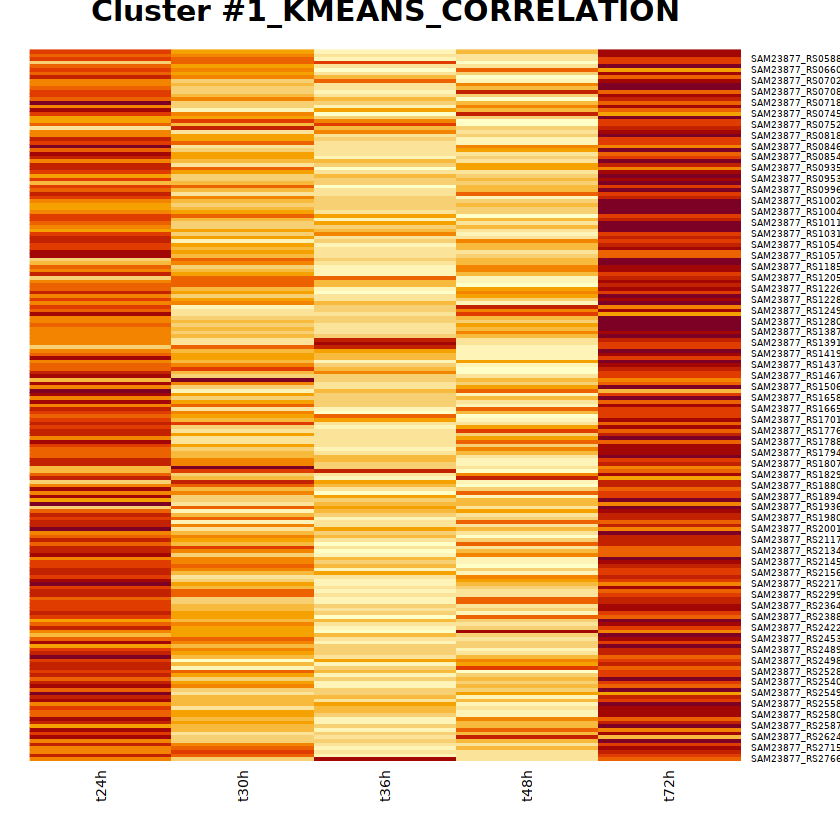

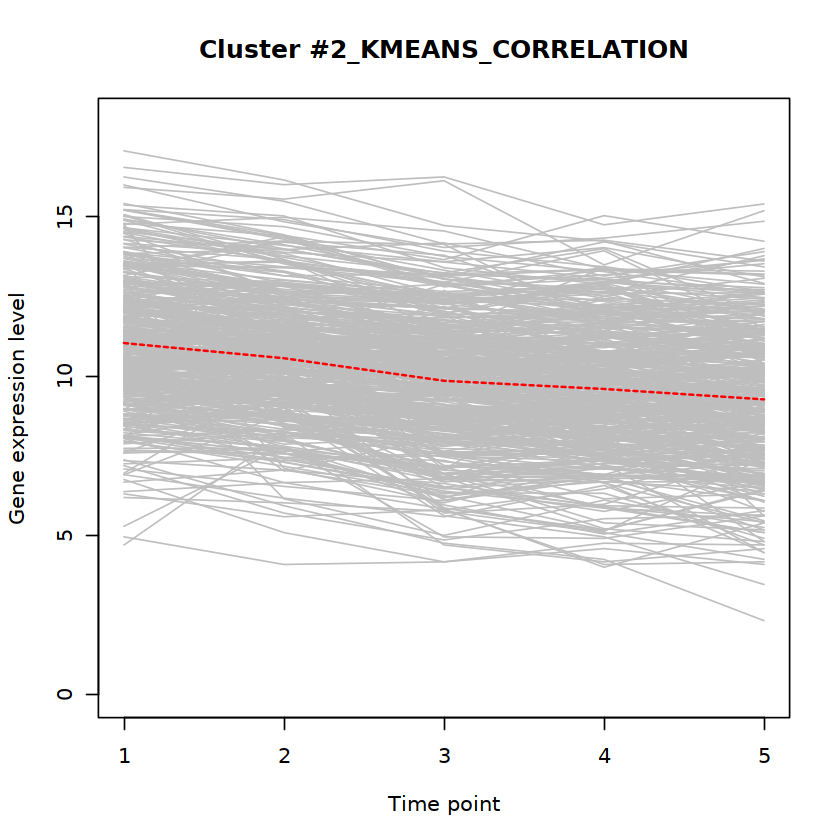

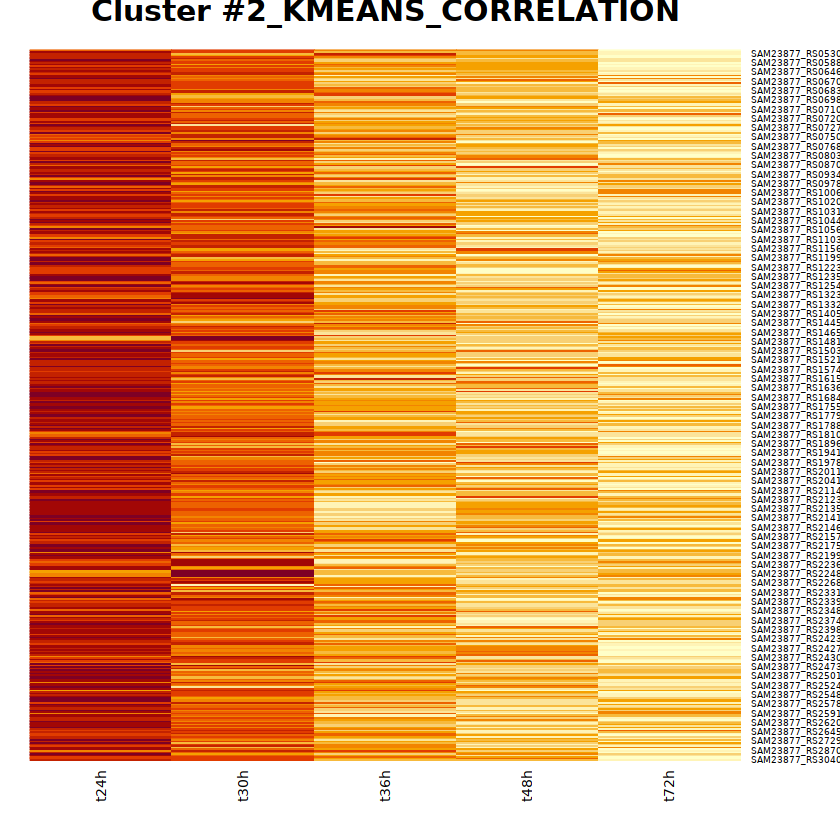

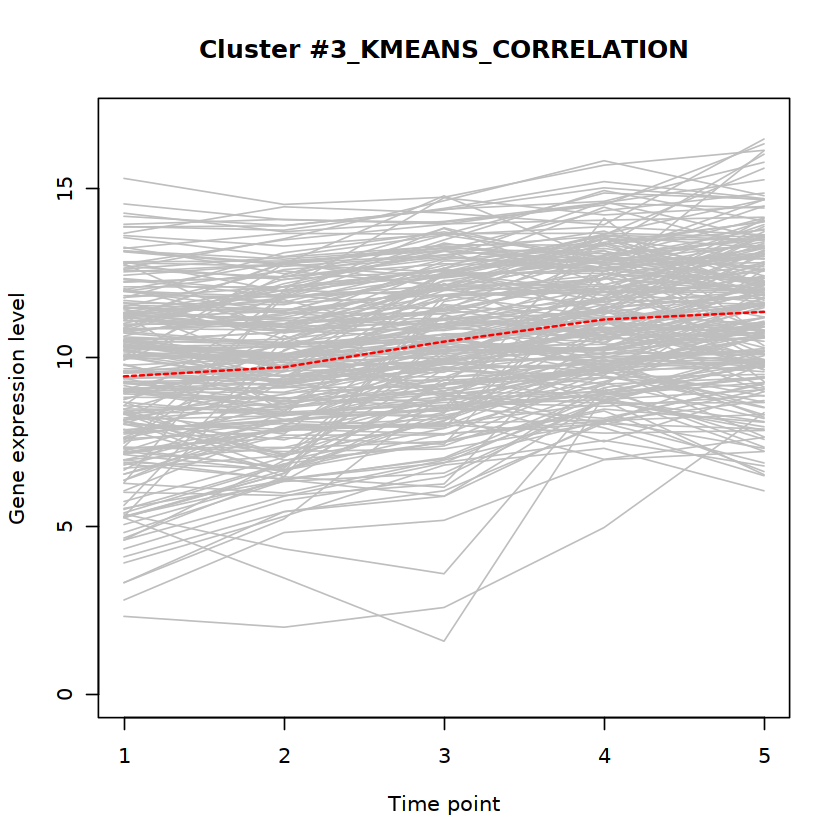

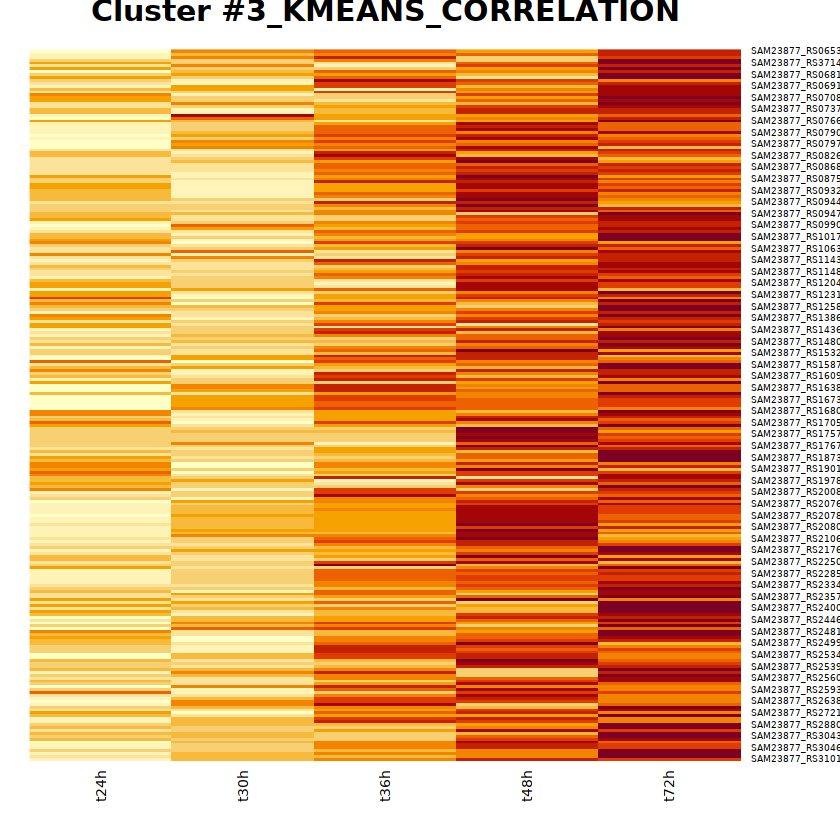

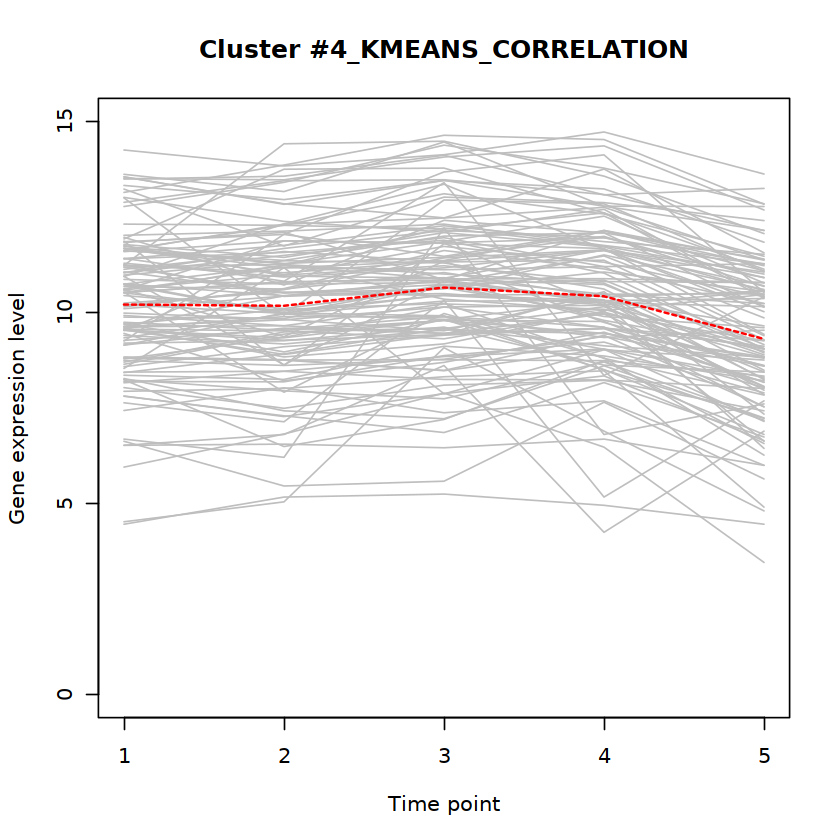

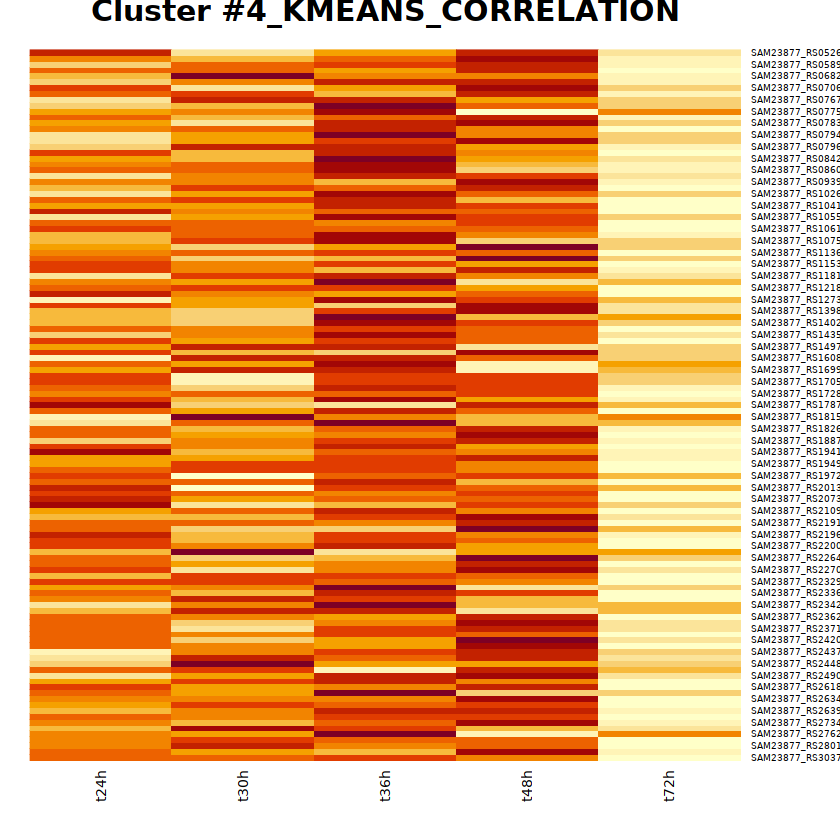

In [12]:
myClustering(fileName = "Strepto_core_genes_log2.txt", 
             distance = "CORRELATION",
             algo = "KMEANS",
             N    = 4,
             outputGraph = "BOTH",
             genelist = "TRUE")